In [2]:
import numpy as np

In [3]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [4]:
import math
from scipy.stats import norm

In [7]:
def value(theta, **kwargs):
    _ = kwargs
    return 0.3*norm(-4, np.sqrt(2)).pdf(theta) + 0.7*norm(3, np.sqrt(6)).pdf(theta)

In [8]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

In [14]:
post = metroplis(-0.5, value, proposal, 3000, sigma=0.5)

In [10]:
from scipy import stats
import matplotlib.pyplot as plt


In [11]:
likelihood = lambda thetas: stats.binom(N, thetas).pmf(k)

thetas = np.linspace(0, 1, 200)

In [13]:
a, b = 10, 10

N = 100
k = 61

In [15]:
prior = stats.beta(a, b)

NameError: name 'thetas' is not defined

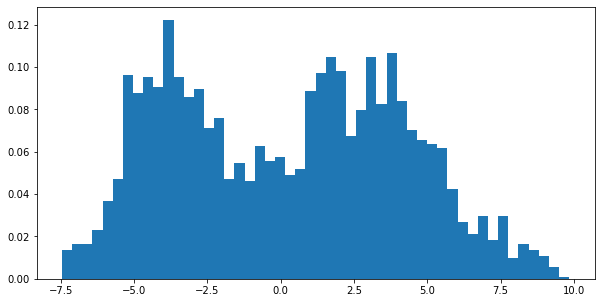

In [11]:
fig = plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(post, bins=50, density=True, label='MCMC posterior')
plt.plot(thetas, stats.beta(k+a, N-k+b).pdf(np.linspace(0, 1, 200)),
         label='True posterior', c='red')
plt.legend(fontsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Задача 1

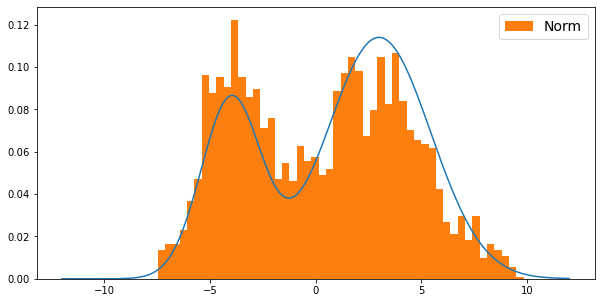

In [13]:
from scipy.stats import norm

x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.hist(post, bins=50, density=True, label ='Norm')
plt.legend(fontsize=14)
plt.show()

# Задача 2

Функция проверки на вершины - выводит логические переменные для последующего отброса граничных вершин 

In [67]:
def proverka(graph, v):
    if graph[v[0], v[1]] == 1:
        return True
    else:
        k = range(10)
        j = range(10)
        A = [[-1,0],[0,-1],[0,1],[1,0]]
        for i in A:
            num1 = v[1]+i[0]
            num2 = v[0]+i[1]
            if num1 in k: 
                if num2 in j:
                    if graph[num2, num1]==1:
                        return False
        return True 
    

mean = 23.716528347165283


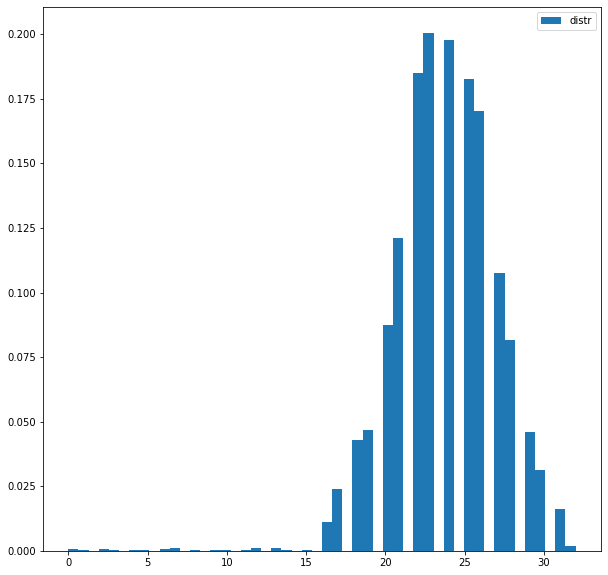

In [74]:
graphs=[]
graphs.append(np.zeros((10, 10)))
t=[]

for i in range(10000):
    graph=np.zeros((10,10))
    n=np.random.randint(10, size=2)
    #print(n)
    if proverka(graphs[-1], n)==True and np.random.rand()>0.5:
        if graphs[-1][n[0], n[1]]==1:
            
            graph[n[0], n[1]] = -1
        else:
            graph[n[0], n[1]] = 1
    graphs.append(graphs[-1]+graph)
for i in graphs:
    t.append(np.sum(i))
m=np.asarray(t).mean()
print('mean = ' + str(m))
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.patch.set_facecolor('xkcd:white')
plt.hist(t, bins=50, density=True, label="distr")
plt.legend()
plt.show()